# Aufgabe 3

In [1]:
from sympy import *
init_printing()

from matplotlib import pyplot as plt, ticker as tk
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import pandas as pd

from fun_expr import Function_from_Expression as FE

In [2]:
V_ra = 7*8*3.5 # m**3

n = 20 # Personen
dV_sch = n*18e-3 # in m**3/h
dV_sch

In [3]:
k_au = 400e-6 # 400 ppM
k_0 = 2400e-6 # 2400 ppM
k_zul = k_inf = 1000e-6 # 1000 ppM

dV_au = dV_sch/(k_zul-k_au)
dV_au

In [4]:
beta = dV_au/V_ra
beta

In [5]:
t = Symbol('t')

k = FE(t, k_au + (k_0 - k_au)*exp(-beta*t),name='k')
k.equation()

<IPython.core.display.Math object>

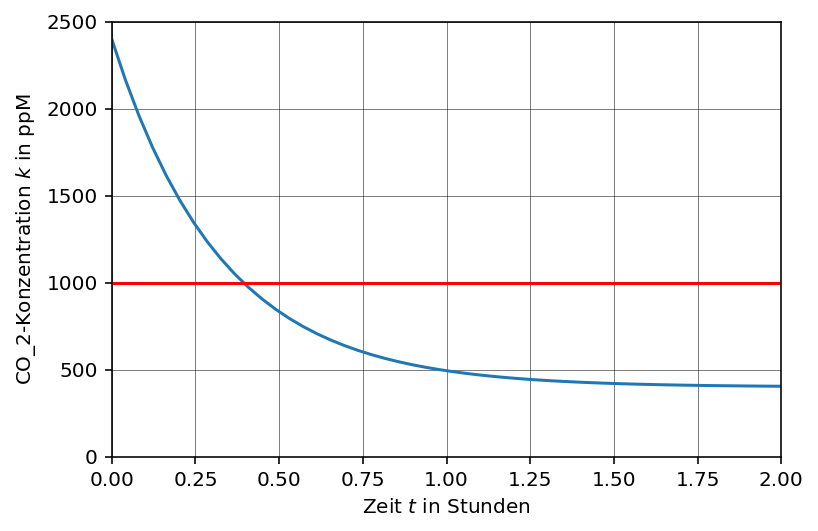

In [6]:
fig, ax = plt.subplots()

lt = np.linspace(0,2)
ax.plot(lt,1e6*k.lambdified(lt))

ax.set(
    xlim=(0,2),xlabel='Zeit $t$ in Stunden',
    ylim=(0,2500), ylabel='CO_2-Konzentration $k$ in ppM'
)

ax.axhline(1000,c='r')

ax.grid(lw=0.25, c='k')

In [7]:
t_1 = -1/beta*ln((k_au-k_zul)/(k_au-k_0))
t_1, 1e6*k(t_1)

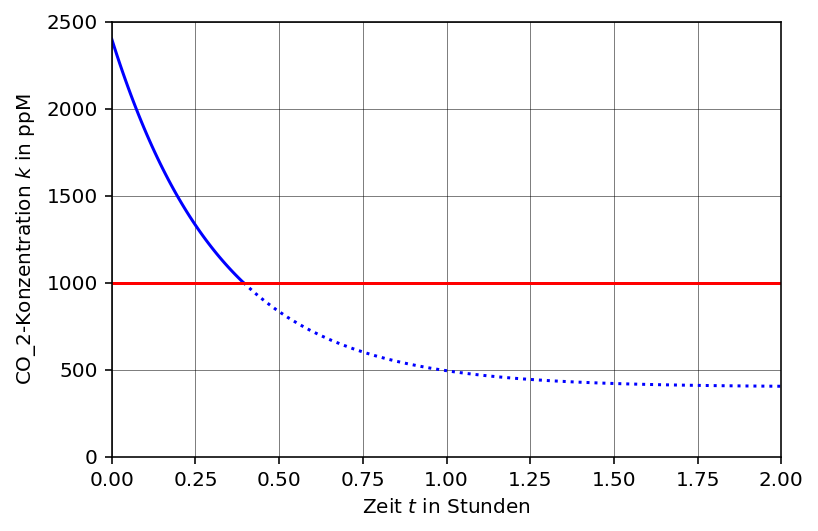

In [8]:
fig, ax = plt.subplots()

lt = np.linspace(0,float(t_1))
ax.plot(lt,1e6*k.lambdified(lt),c='b')

lt = np.linspace(float(t_1),2)
ax.plot(lt,1e6*k.lambdified(lt),ls='dotted',c='b')

ax.axhline(1000,c='r')

ax.set(
    xlim=(0,2),xlabel='Zeit $t$ in Stunden',
    ylim=(0,2500), ylabel='CO_2-Konzentration $k$ in ppM'
)

ax.grid(lw=0.25, c='k')

In [9]:
t_1*60 # t_1 in Minuten

Nach 24 Minuten ist die erlaubte Schadstoffkonzentration von 1000 ppM erreicht. 

# Zusatzfrage:

Was passiert, wenn eine Pause von 15 Minuten eingehalten wird?

In [10]:
t_2 = S(1)/4
k_1 = FE(t, Piecewise((k(t),t <= t_2),(k_inf + (k(t_2)-k_inf)*exp(-beta*(t-t_2)),True)))

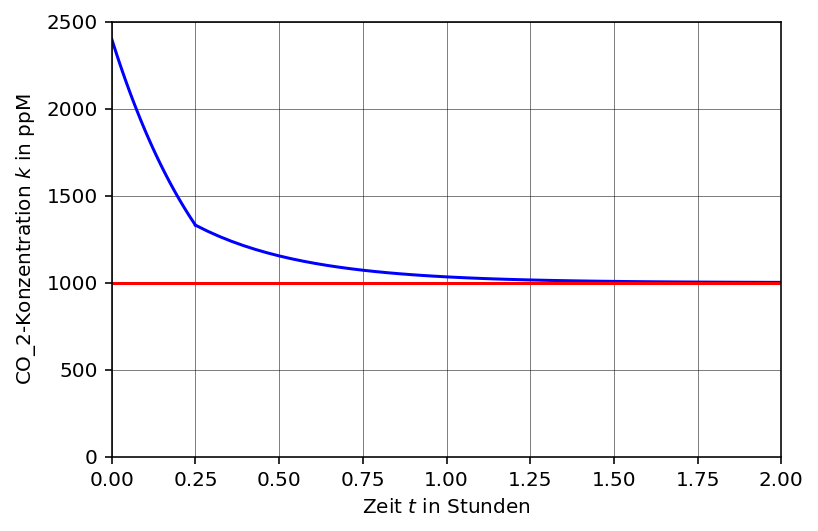

In [11]:
fig, ax = plt.subplots()

lt = np.linspace(0,float(t_2))
ax.plot(lt,1e6*k_1.lambdified(lt),c='b')

lt = np.linspace(float(t_2),2)
ax.plot(lt,1e6*k_1.lambdified(lt),c='b')

ax.axhline(1000,c='r')

ax.set(
    xlim=(0,2),xlabel='Zeit $t$ in Stunden',
    ylim=(0,2500), ylabel='CO_2-Konzentration $k$ in ppM'
)

ax.grid(lw=0.25, c='k')